In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\Decison Trees\\Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.ShelveLoc=preprocessing.LabelEncoder().fit_transform(data.ShelveLoc)

In [6]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [7]:
data.loc[data["Sales"] <= 10.00,"Sales1"]="Not High"
data.loc[data["Sales"] >= 10.01,"Sales1"]="High"

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,0,38,13,Yes,No,Not High


In [9]:
label_encoder = preprocessing.LabelEncoder()
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])
data["Sales1"] = label_encoder.fit_transform(data["Sales1"])

In [10]:
x=data.iloc[:,1:11]
y=data["Sales1"]
y=y.astype(int)

In [11]:
data.Sales1.value_counts()

1    322
0     78
Name: Sales1, dtype: int64

# C5.0

In [12]:
x_train, x_test, y_train, y_test =tts(x,y,test_size=0.2)

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

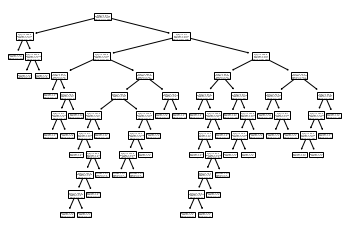

In [75]:
tree.plot_tree(model);

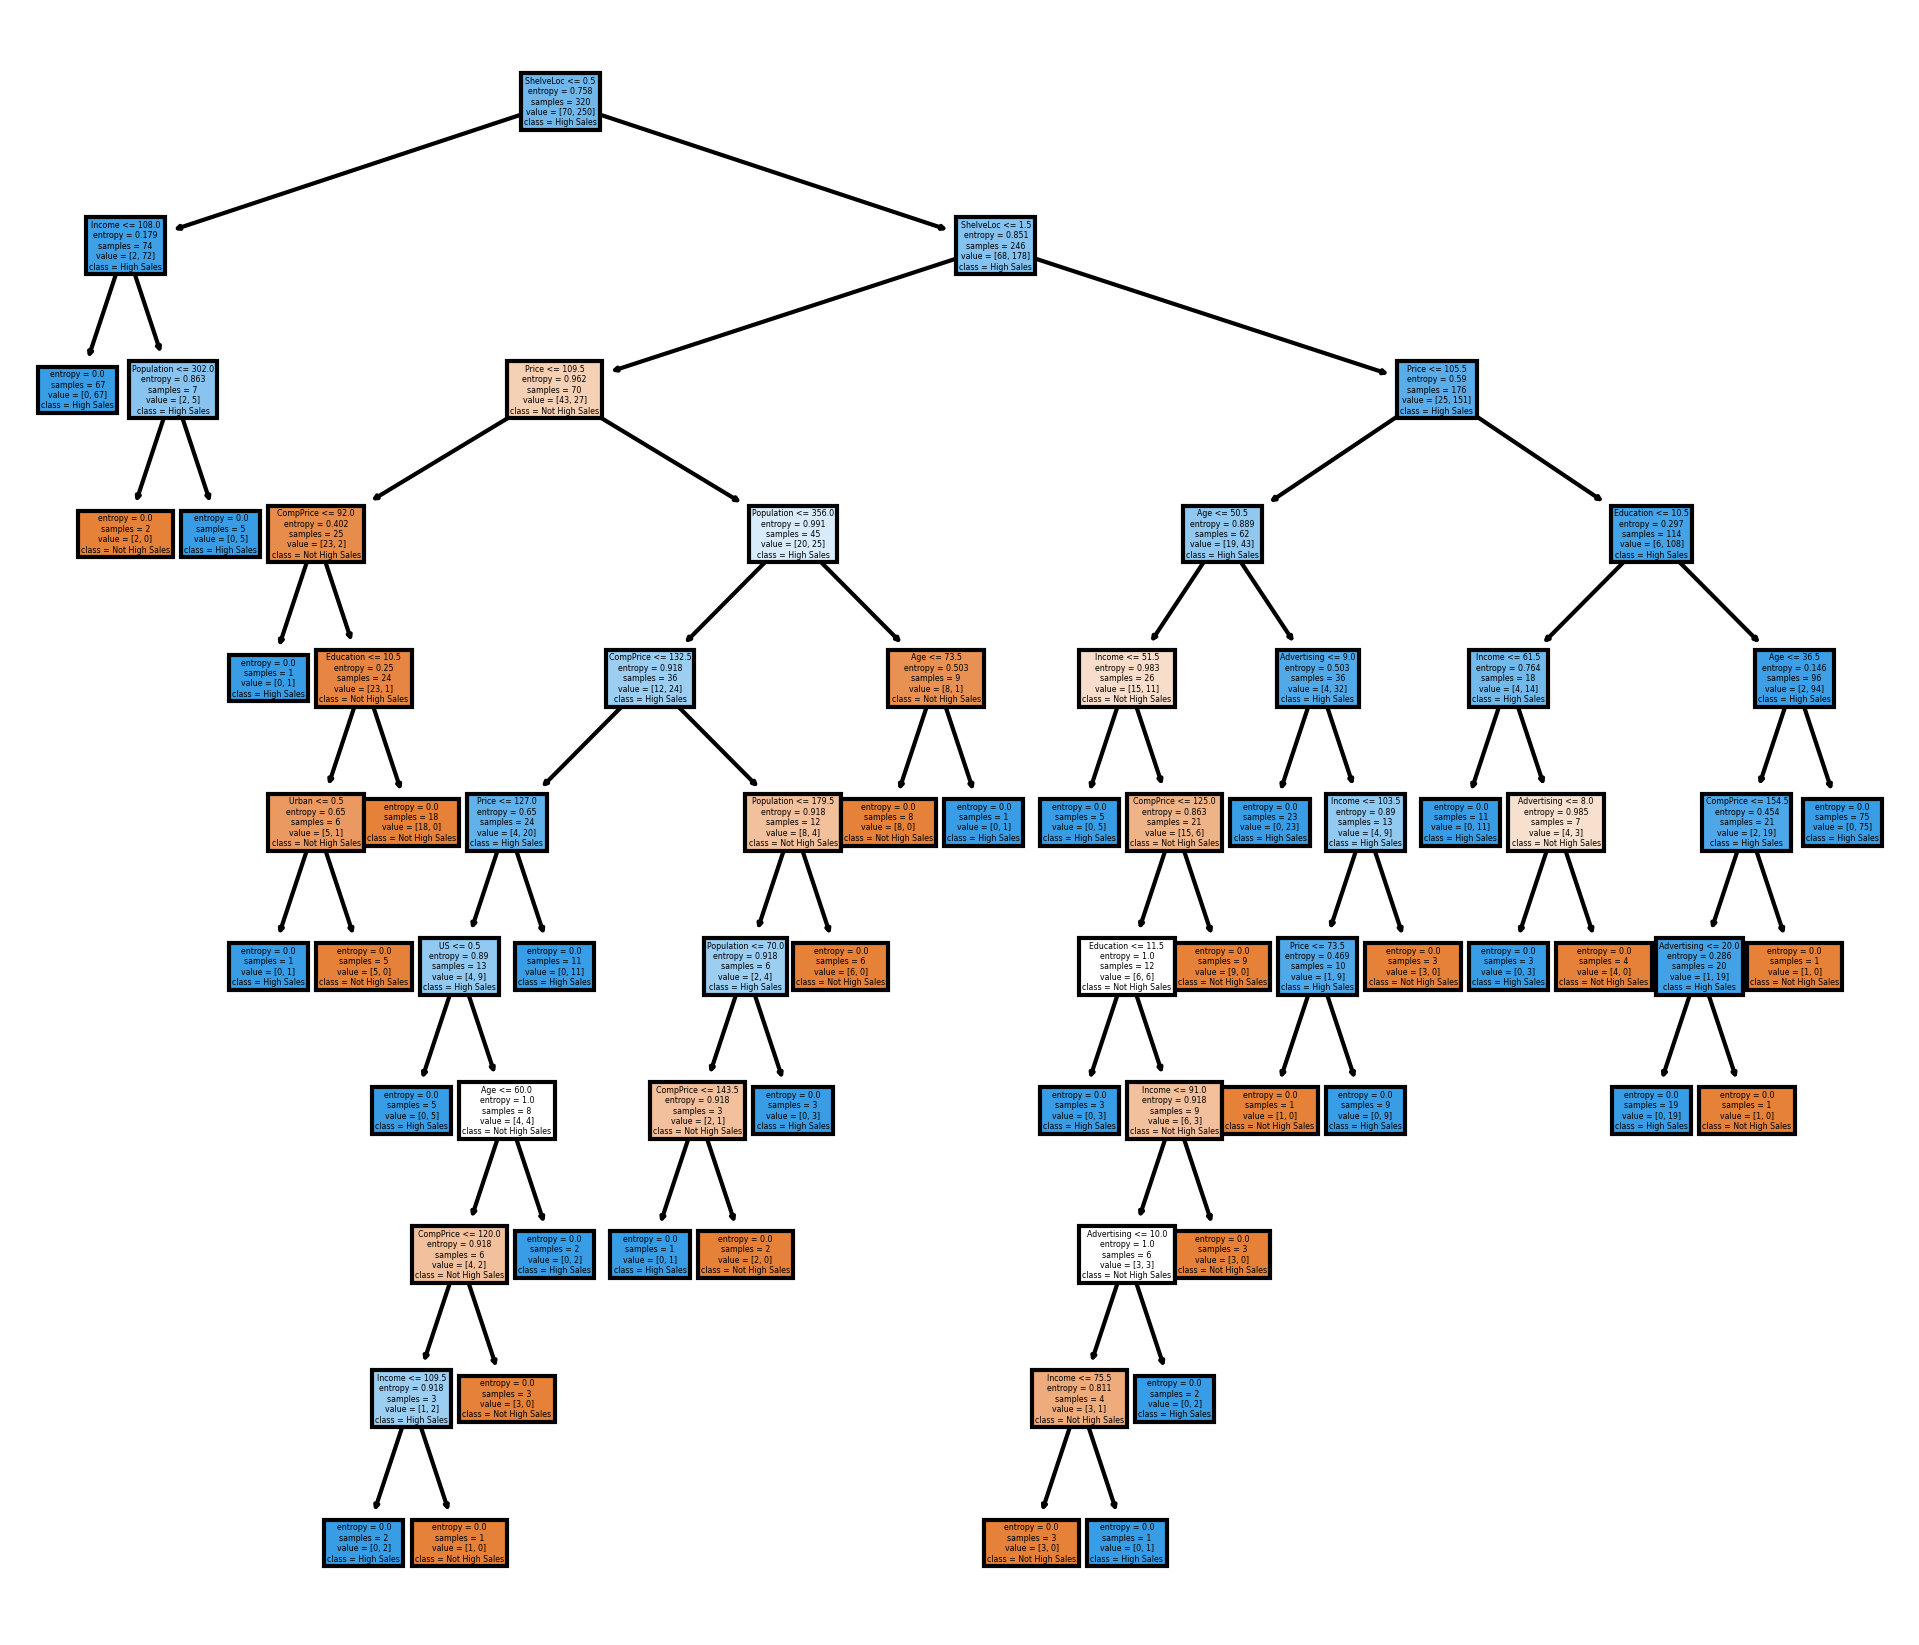

In [76]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Not High Sales', 'High Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,7), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [77]:
predtrain=model.predict(x_train)

In [80]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,predtrain)

In [81]:
train_accuracy

1.0

In [85]:
predtest=model.predict(x_test)
test_accuracy=accuracy_score(y_test,predtest)

In [86]:
test_accuracy

0.7875

# cart (gini)

11

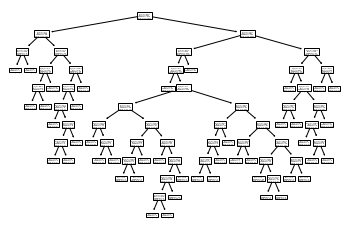

In [92]:
model2 = DecisionTreeClassifier(criterion="gini")
model2.fit(x_train, y_train)
tree.plot_tree(model2)
model2.get_depth()

In [101]:
predtrainy2 = model2.predict(x_train)
accuracytrain2 = accuracy_score(y_train, predtrainy2)
accuracytrain2

1.0

In [105]:
pd.crosstab(y_train,predtrainy2)

col_0,0,1
Sales1,,
0,70,0
1,0,250


In [106]:
predtesty2 = model3.predict(x_test)
accuracytest2 = accuracy_score(y_test, predtesty2)
accuracytest2

0.8375

In [107]:
pd.crosstab(y_test,predtesty3)

col_0,0,1
Sales1,,
0,3,5
1,8,64


# Cart(RSS)

In [108]:
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(x_train,y_train)

DecisionTreeRegressor()

11

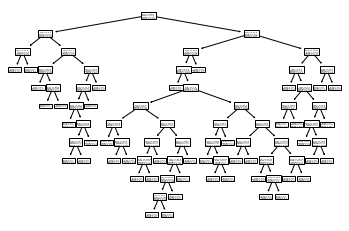

In [109]:
tree.plot_tree(model3)
model3.get_depth()

In [110]:
predtrainy3 = model3.predict(x_train)
accuracytrain3 = accuracy_score(y_train, predtrainy3)
accuracytrain3

1.0

In [111]:
predtesty3 = model3.predict(x_test)
accuracytest3 = accuracy_score(y_test, predtesty3)
accuracytest3

0.85

# LGBM

In [15]:
import lightgbm as lgb
traind = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.703
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [16]:
model4 = lgb.train(params, traind, 1280)

[LightGBM] [Info] Number of positive: 256, number of negative: 64
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.800000 -> initscore=1.386294
[LightGBM] [Info] Start training from score 1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [20]:
predtrain4 = model4.predict(x_train)
accuracytrain4 = accuracy_score(y_train, predtrain4.round())
print("accuracy : %.2f %%" % (accuracytrain4 * 100))                      

accuracy : 100.00 %


In [22]:
predtest4 = model4.predict(x_test)
accuracytest4 = accuracy_score(y_test, predtest4.round())
print("accuracy : %.2f %%" % (accuracytest4 * 100))

accuracy : 87.50 %


# XGBM

In [24]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [25]:
model5 = XGBClassifier(learning_rate = 0.700, random_state = 40)
model5.fit(x_train, y_train)

[12:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kanis\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
predtrain5 = model5.predict(x_train)
accuracytrain5 = accuracy_score(y_train, predtrain5)
print("accuracy : %.2f %%" % (accuracytrain5 * 100))

accuracy : 100.00 %


C:\Users\kanis\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [27]:
predtest5=model5.predict(x_test)
testaccuracy5=accuracy_score(y_test,predtest5)
print("accuracy : %.2f %%" % (testaccuracy5 * 100))

accuracy : 87.50 %
